# A6 Final Project Report -- Gender Diversity in Movies

### Submitted by : Vamsy Atluri

## Introduction

In today's world 2 of the most widely scrutinized sectors of our society are the movies and tech firms. While they are widely different fields and usually have no relation to each other, one area where they shread a common thread is gender diversity or more accurately the lack of it.

The movie industry have been criticized for gender issues over the years. But the outroar is ususally limited to the most high profile movies and productions. But acting as a profession is not limited to just movies and just Hollywood. International movies, TV shows, short movies are also an important part of this industry. This project is an attempt to look just at the numbers and see how diverse are movies in terms of the gender of people playing roles on the screen.

The results are then compared against diversity numbers released by 6 top tech companies (Facebook, Amazon, Apple, Microsoft and Google) for the year of 2017 to see how these two fields stack up. This comparison throws up some insights that are quite surprising and eye opening.

## Background

When it comes to movies and gender, the Bechdel test is perhaps the most commonly known and accepted way of determining how much independent representation and interaction females have. This project, which looks only at the numbers of credited actors/actresses, is not that comprehensive and the results are not a conclusive indication of the full picture. But augmented with other inputs (like the bechdel test), my hope is it will help build a clearer picture. The core question being asked here is -- How gender diverse are movies solely in terms of actors on the screen? 

Under pressure for their lack of gender diversity, major companies in the tech sector have been releasing their workforce diversity information over the last few years showing how they have been improving their diversity over the years. But hiring a lot of females interns for the summer or junior employees is given the same weight as having a management structure full of males. I try to look into how these two fields' statisctics would compared if movies are afforded the same leeway as these tech firms.

Once again, I am not proposing that is a very comprehensive analysis since first of all, it is restricted only to actors and actresses and not any other crew member. So the results of this analysis must be taken with a pinch of salt, while being open to interpretation.

## Data and Methods

This project looks at gender diversity in movies over the past 118 years (1910-2018). The data used is provided by IMDB, and contains all the data on their website with respect to movies, release date, actors and actresses in the movie etc in the form on zipped tsv files. Due to the size being > 100MB, I have made a subset of the data available in the data folder of this repo as tsv files. These files can be used to reproduce the analyis done in this project.

The most ideal case would have been to get gender related information about all the crew members who work on a movie, but IMDB does not store gender information about any person. The only way to identify actors vs. actresses is to depend on the lsiting which classifies them either as 'actor' or 'actress'. This was a potential roadblock both due to lack of non-binary gender representation and also lack of info for people working behind the scenes.

But delving more in IMDB's policies, I realized that IMDB allows people to create their profile and add themselves to the credits of movies they acted in (subject to verification). And the most interesting thing was that it identifies them by their preferred gender. While not optimal, it seemed more ethical to work with this data because the gender information I would be getting about a person was not what IMDB chooses but what the person choose him/herself.

Coming to the diversity data in tech companies, I manually read the diversity reports publicly published by the companies for the year of 2017 and stored these values in an array for the purposes of comparison.

The overall number of records in the source data considered were 1.6M movies, 8.9M actors and actresses, and nearly 31M records of the crew details. A lot of this was filtered out to keep details of only actors and actresses, mainly because there is no gender information available for other crew members like directors, producers, cinematographers etc.

The three major tables considered -- movie_title_details, actor_details and movie_crew_details. Python libraries pandas, numpy and matplotlib were used for data analysis and visualization. This section shows how to read the data, show the structures and columns of the tables, analyze the data and visualize the results.

#### Importing the necessary libraries, and setting the warnings to ignore

In [1]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Reading the data

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column.

Note: Using gzip.open is not necessary unless using the original data files from the IMDB website. For the purposes of this analysis I have used the orginal dataset. So this command **will not work** unless you have downloaded the zipped files from the link shared in the readme.

**If using the tsv files from the 'data' folder in this repo use the commands which have been commented out in the follwowing code block.**

In [2]:
movie_title_details = pd.read_table(gzip.open("title.basics.tsv.gz"))
actor_details = pd.read_table(gzip.open("name.basics.tsv.gz"))
movie_crew_details = pd.read_table(gzip.open("title.principals.tsv.gz"))

# movie_title_details = pd.read_table('./data/movie_title_basics.tsv')
# actor_details = pd.read_table('./data/actor_details.tsv')
# movie_crew_details = pd.read_table('./data/movie_crew_details.tsv')

#### Dimensions of the data

The ```.shape``` attribute gives us the dimensions of the tables as (number_of_rows,number_of_columns).

In [3]:
movie_title_details.shape

(5453946, 9)

As seen, there are 5,453,946 movies overall to consider.

In [4]:
actor_details.shape

(8996619, 6)

As seen, there are 8,996,619 records about professionals registered on IMDB overall to consider.

Note: I have named the dataframe as actors because they are the primary section am interested in. But the file ```name.basics.tsv``` contains the information for all the people irrespective of their primary occupation. The entries will be filtered out to include only actors/actresses.

In [5]:
movie_crew_details.shape

(31132240, 6)

The ```title.principals.tsv``` lists all the related professionals credited for a particular movie. Essentially, it brings the previous two tables together. As seen, there are 31,132,240 such entries overall to consider.

#### Structure and details about the data

The ```title.basics.tsv.gz``` file, which is stored in the ```mvoie_title_details``` dataframe lists all the movies in the IMDB database, along with the movie type, year (release year for movies, start and end year for TV shows), runtime and genres. 

While the title, genre etc. are not required for my analysis the ```tconst``` column which is an unique identifier for each movie and the year columns are the most relevant.

In [6]:
movie_title_details.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Note :  A ‘\N’ is used to denote that a particular field is missing for that title/name.

With regard to the ```actor_details``` dataframe, initially my idea was to use the primaryProfession column to filter only entries that have actor/actress as the first entry. Each entry has a unique identifier ```nconst```.

But this table proved redundant since the ```movie_crew_details``` dataframe had a identifier that served the same purpose. As of now this table has not been used any further. But this table can be used in the future to do a more layered analysis since it has details about the ages of the professionals on IMDB.

In [7]:
actor_details.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0049189,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0072562,tt0078723,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"


As said earlier, the ```title.principals.tsv``` file brings the two other files above together by listing each movie and its crew as a list of entries with the unique identifiers tconst and nconst identifying each tuple.

In [8]:
movie_crew_details.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


#### Data Cleaning and Filtering

##### Movies -- A few decisions with regard to which titles to consider in this analysis:

Titles with missing values for runtime were not considered.

In [9]:
movie_title_details = movie_title_details[movie_title_details.runtimeMinutes != '\\N']

Movies with runtime less than 20 mins were not considered. Most of the short movies and sit-com episodes were covered with this runtime. In this step we also create a ```new dataframe movies``` which is the truncated version of the original movie_title_details table.

In [10]:
intruntimes = pd.to_numeric(movie_title_details['runtimeMinutes'], errors='coerce')
plus20 = intruntimes>20
movies = movie_title_details[plus20]

Videogames credits were not considered.

In [11]:
movies = movies[movies.titleType != 'videoGame']

Titles rated adult were not considered.

In [12]:
movies = movies[movies.isAdult != 1]

The pruned movies table is shown below.

In [13]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
443,tt0000446,short,Kit Carson,Kit Carson,0,1903,\N,21,"Short,Western"
496,tt0000499,short,An Impossible Voyage,Le voyage à travers l'impossible,0,1904,\N,24,"Adventure,Fantasy,Sci-Fi"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


Finally, the columns that are not requisite for the purposes of the analysis are dropped as well. 

In [14]:
movies = movies.drop(['genres','isAdult','originalTitle'], axis=1)

The index is then reset using the ```reset_index()``` function.

In [15]:
movies = movies.reset_index(drop=True)

As seen below the number of movies considered drops down to just over a million.

In [16]:
movies.shape

(1092301, 6)

##### Movie Crew details -- Since only actors and actresses are being considered, the rest of the categories in this table can be ignored.

The movie_crew_details tables' categories are shown below

In [17]:
np.unique(movie_crew_details.category)

array(['actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer', 'director', 'editor', 'producer',
       'production_designer', 'self', 'writer'], dtype=object)

Creating a ```new dataframe crew``` that only has the enties related to actors and actresses:

In [18]:
crew = movie_crew_details[(movie_crew_details.category == 'actor') | (movie_crew_details.category == 'actress')]

In [19]:
crew.shape

(12845768, 6)

We see that the number of records has dropped to 12.8 millions.

Again, we reset the index of the dataframe

In [20]:
crew = crew.reset_index(drop=True)

We can verify the categories to be the ones needed

In [21]:
np.unique(crew.category)

array(['actor', 'actress'], dtype=object)

In [22]:
crew.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
2,tt0000007,1,nm0179163,actor,\N,\N
3,tt0000007,2,nm0183947,actor,\N,\N
4,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"


Since we don't need the job, characters and ordering tables we drop them from the crew dataframe.

In [23]:
crew = crew.drop(['job','characters','ordering'], axis=1)

In [24]:
crew.head()

,tconst,nconst,category
0,tt0000005,nm0443482,actor
1,tt0000005,nm0653042,actor
2,tt0000007,nm0179163,actor
3,tt0000007,nm0183947,actor
4,tt0000008,nm0653028,actor


#### Data Aggregation

First, we create a new dataframe that effectively does an inner join of the movies and crew tables on the common ```tconst``` identifier that uniquely identifies every movie. This is done using the ```pandas merge``` function. The resulting table is stored in the ```overall dataframe```.

In [25]:
overall = pd.merge(movies, crew, on='tconst')

In [26]:
overall.head()

,tconst,titleType,primaryTitle,startYear,endYear,runtimeMinutes,nconst,category
0,tt0000009,movie,Miss Jerry,1894,\N,45,nm0063086,actress
1,tt0000009,movie,Miss Jerry,1894,\N,45,nm0183823,actor
2,tt0000499,short,An Impossible Voyage,1904,\N,24,nm0617588,actor
3,tt0000499,short,An Impossible Voyage,1904,\N,24,nm0016317,actress
4,tt0000499,short,An Impossible Voyage,1904,\N,24,nm0194945,actress


As we see above, each movie title is grouped along with the actors and actresses credited for it. FOr instance, the movie 'Miss Jerry' had an actress identified by nconst = 'nm0063086' and actor with nconst = 'nm0183823'.

We now can drop all the non-requisite columns from the overall dataframe.

In [27]:
overall = overall.drop(['titleType','runtimeMinutes','nconst','endYear','primaryTitle'], axis=1)

Now, when we try to make sure that the 'startYear' columns have integer entries, we see that the .dtype command shows the columns as belonging to object type. This means that there are mixed datatype entries in this column (some as strings, some as integers).

In [28]:
overall.startYear.dtype

dtype('O')

So we convert all the entries to numeric which is easier for further analysis. But before we can do that we need to eliminate any missing entries which are marked as '\N'.

In [29]:
overall = overall[overall.startYear != '\\N']
overall['startYear'] = pd.to_numeric(overall['startYear'])

In [30]:
overall.head()

,tconst,startYear,category
0,tt0000009,1894,actress
1,tt0000009,1894,actor
2,tt0000499,1904,actor
3,tt0000499,1904,actress
4,tt0000499,1904,actress


In [31]:
overall.shape

(3326783, 3)

Thus, for our final analysis we have a dataframe of 3.3M entries. To split this and get separate table for actors and actresses we first create three empty dataframes.

In [32]:
numbers = pd.DataFrame()
males = pd.DataFrame()
females = pd.DataFrame()

Grouping by (year,category) will give us the tuples for each year and actor/actress combination. To do this, we use the ```pandas groupby``` function.

In [33]:
numbers = overall.groupby(['startYear','category']).size().reset_index(name='counts')

In [34]:
numbers.head()

,startYear,category,counts
0,1894,actor,1
1,1894,actress,1
2,1903,actor,1
3,1903,actress,1
4,1904,actor,2


Now we split this dataframe into two dataframes, one for actors, one for actresses.

In [36]:
actors = numbers[numbers.category=='actor']
actresses = numbers[numbers.category=='actress']

In [37]:
actors.head()

,startYear,category,counts
0,1894,actor,1
2,1903,actor,1
4,1904,actor,2
6,1905,actor,2
7,1906,actor,2


In [38]:
actresses.head()

,startYear,category,counts
1,1894,actress,1
3,1903,actress,1
5,1904,actress,4
8,1906,actress,2
10,1907,actress,3


Since we no longer need the category column, we drop it and also reset the index on both these dataframes.

In [39]:
actors = actors.drop('category', axis=1)
actors = actors.reset_index(drop=True)

actresses = actresses.drop('category', axis=1)
actresses = actresses.reset_index(drop=True)

In [40]:
actors.head(10)

,startYear,counts
0,1894,1
1,1903,1
2,1904,2
3,1905,2
4,1906,2
5,1907,1
6,1908,17
7,1909,17
8,1910,64
9,1911,174


In [41]:
actresses.head(10)

,startYear,counts
0,1894,1
1,1903,1
2,1904,4
3,1906,2
4,1907,3
5,1908,4
6,1909,17
7,1910,30
8,1911,92
9,1912,135


We see very low numbers for the years before 1910 and in some cases no entries for actresses in some years. Hence we eliminate those years and consider the numbers from 1910 and afterwards. After dropping the tables we also reste the index.

In [42]:
actors = actors.drop([0,1,2,3,4,5,6,7])
actresses = actresses.drop([0,1,2,3,4,5,6])

actors = actors.reset_index(drop=True)
actresses = actresses.reset_index(drop=True)

In [43]:
actors.tail()

,startYear,counts
106,2016,80872
107,2017,78443
108,2018,58015
109,2019,2529
110,2020,49


In [44]:
actresses.tail()

,startYear,counts
106,2016,55176
107,2017,54642
108,2018,39899
109,2019,1537
110,2020,37


To not include future unreleases movies which are sometimes credited early on the IMDB website for marketing purposes, we will drop the entries for years after 2017.

In [45]:
actors = actors.drop([108,109,110])
actresses = actresses.drop([108,109,110])

actors = actors.reset_index(drop=True)
actresses = actresses.reset_index(drop=True)

In [46]:
actors.shape

(108, 2)

In [47]:
actresses.shape

(108, 2)

Another important statistic we need to get better understanding of the data is the number of actors/actresses as a percentage of the total number credited. We will derive those in the following steps.

First, we create an empty dataframe percentages for this purpose. Then we add the years, number of actors and number of actresses as columns using the actors and actresses dataframes.

In [48]:
percentages = pd.DataFrame()

#getting years and adding them to the empty dataframe
years = pd.DataFrame(actors.startYear)
percentages = percentages.append(years)

#creating dataframes of the actor and actress counts.
num_actors = pd.DataFrame(actors.counts)
num_actors.columns = ['num_actors']

num_actresses = pd.DataFrame(actresses.counts)
num_actresses.columns = ['num_actresses']

#adding the dataframes created above to the percentages dataframe.
percentages = percentages.join(num_actors)
percentages = percentages.join(num_actresses)

Using these columns, we add new columns that are the sum of the number of actors and actresses, percentage of actors and percentage of actresses.

In [49]:
percentages['sum'] = percentages['num_actors']+percentages['num_actresses']
percentages['actor_percentage'] = ((percentages['num_actors']/percentages['sum'])*100)
percentages['actress_percentage'] = ((percentages['num_actresses']/percentages['sum'])*100)

In [50]:
percentages.head()

,startYear,num_actors,num_actresses,sum,actor_percentage,actress_percentage
0,1910,64,30,94,68.085106,31.914894
1,1911,174,92,266,65.413534,34.586466
2,1912,231,135,366,63.114754,36.885246
3,1913,545,306,851,64.042303,35.957697
4,1914,687,412,1099,62.511374,37.488626


#### Corporate Companies Diversity Data

Physically collecting the publically released data by five major companies on their websites, I have created two dataframes to store these values. One of them stores the gloabal workforce diversity percentages, while the other stores only tech workforce diversity percentages. 

(Note: Amazon releases only global workforce statistics, hence tech workforce diversity percentages are not available).

In [51]:
males_percent_global = [64,60,68,73.4,74.5]
females_percent_global = [36,40,32,26.6,25.5]
index = ['facebook', 'amazon', 'apple', 'microsoft', 'google']
global_percent = pd.DataFrame({'men': males_percent_global,'women': females_percent_global}, 
                                   index=index)
global_percent

,men,women
facebook,64.0,36.0
amazon,60.0,40.0
apple,68.0,32.0
microsoft,73.4,26.6
google,74.5,25.5


In [52]:
males_percent_tech = [78,0,77,81.5,78.6]
females_percent_tech = [22,0,23,18.5,21.4]
tech_only_percent = pd.DataFrame({'men': males_percent_tech,'women': females_percent_tech},
                                 index=index)
tech_only_percent

,men,women
facebook,78.0,22.0
amazon,0.0,0.0
apple,77.0,23.0
microsoft,81.5,18.5
google,78.6,21.4


So now we have the number of actors and actresses credited in a movie from the year 1910 - 2017, along with their percentages as well the percentages showing diversity in tech companies. We can now visualize the results.

### Findings and Discussion

In this section, we will use the data from previous sections, visualize it to find trends and answers to our questions and discuss what these findings mean.

For visualization purposes, we create an array containing the years being considered. This will be used as X-Axis for the graphs.

In [53]:
years = np.arange(1910,2018,1)
years = years.reshape(108,1)

##### Visualization 1 - Time series graph of total number of actors vs actresses in credited movie roles.

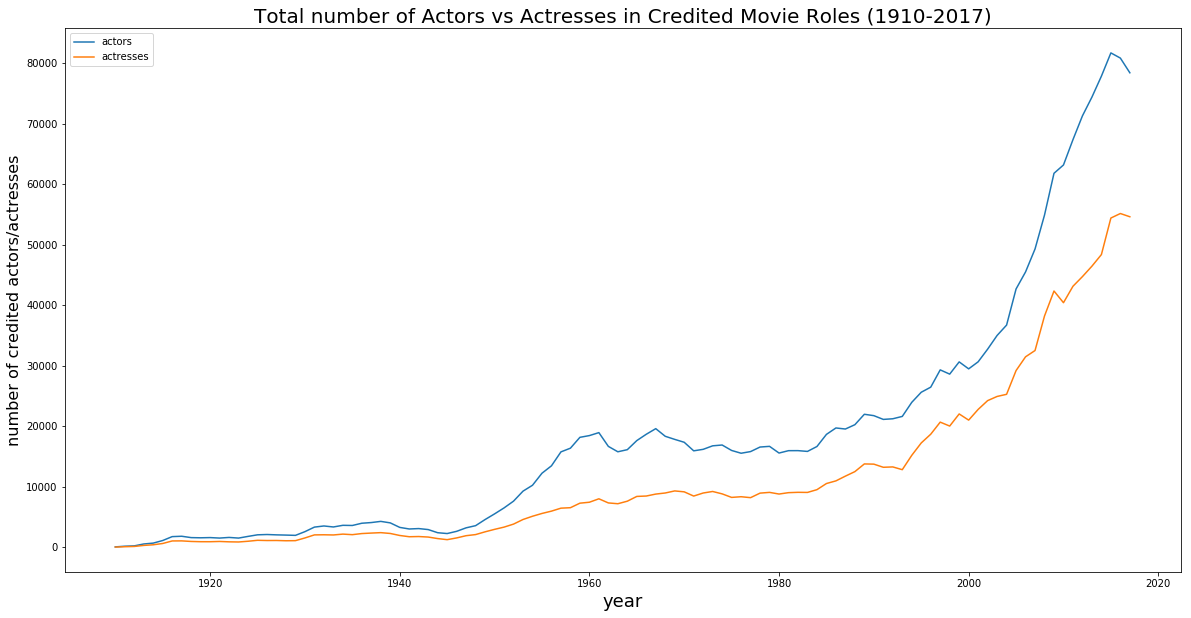

In [54]:
plt.figure(figsize=(20,10))

plt.plot(years, actors.counts)
plt.plot(years, actresses.counts)

plt.legend(['actors', 'actresses'], loc='upper left')
plt.title('Total number of Actors vs Actresses in Credited Movie Roles (1910-2017)', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('number of credited actors/actresses', fontsize=16)

plt.show()

###### Finding 1 : As expected, we see that the number of actors in the industry has always been higher than the number of actresses. The gap between the two looks to be highest just before 1960. While the situation looked to be improving for a while, the gap appears to have suddenly blown up in the last decade or so -- with a highly disproportionate number of actors dominating the scene as compared to actresses.

##### Visualization 2 - Time series graph of percentage of actors vs actresses in total credited movie roles per year.

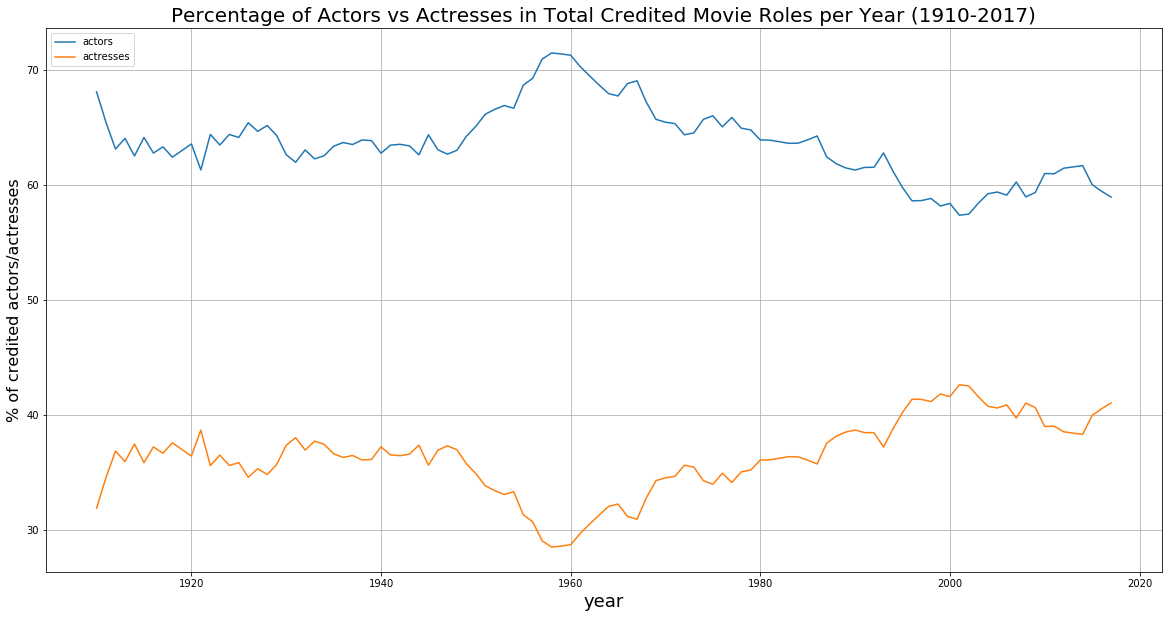

In [55]:
plt.figure(figsize=(20,10))

plt.plot(years, percentages.actor_percentage)
plt.plot(years, percentages.actress_percentage)

plt.legend(['actors', 'actresses'], loc='upper left', fontsize=10)
plt.title('Percentage of Actors vs Actresses in Total Credited Movie Roles per Year (1910-2017)', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('% of credited actors/actresses', fontsize=16)

plt.grid()
plt.show()

###### Finding 2: Comparing the percentages gives a much cleare picture of how gender diversity has played out in the movies. The lowest percentage of actresses in the industry appears to be just before 1960 with a noticeable increase in the years following. There also appears to be a spike post 1990.

Digging into this finding more, we realize that mid and late 1960s were a period of breakthroughs in women's rights and feminist movements not only in the USA but all over the world. In 1963, The Equal Pay Act was passed by Congress which gave equal wages for equal work, regardless of the race, color, religion, national origin or sex of the worker. In 1964, the Title VII of the Civil Rights Act was passed which prohibited employment discrimination on the basis of race, color, religion, national origin, or sex. These and many other laws passed in different countries, along with the feminist movement gathering momentum could have had an impact on the movie indutry resulting in more actresses on the screen in the post 1960s period.

##### Visualization 3 - Gender diversity percentages, movies vs. tech firms (All time till 2017).

Taking the gender diversity percentages from 1910 to 2017 from movies and comparing them to the statistics released by companies (which were initially saved in the ```global_percent``` dataframe.

Note: The reason all the years are being compared here is that when companies release their diversity statistics, it is not only for the number of hires they make in that year. It is the total diversity as of the current year, which includes all the people working for them irrespective of when they were hired. And since yearly percentages in movies would only reflect actors/actresses 'hired' in that particular, it would be a fair comparison only if all the years statistics were taken into account.

To get the total percentages, we use the percentages dataframe and calculate the totals:

In [56]:
percentages.head()

,startYear,num_actors,num_actresses,sum,actor_percentage,actress_percentage
0,1910,64,30,94,68.085106,31.914894
1,1911,174,92,266,65.413534,34.586466
2,1912,231,135,366,63.114754,36.885246
3,1913,545,306,851,64.042303,35.957697
4,1914,687,412,1099,62.511374,37.488626


In [57]:
num_actors_total = np.sum(percentages.num_actors)
num_actresses_total = np.sum(percentages.num_actresses)
total_all = num_actors_total+num_actresses_total

Now this can be used to calculate percentage:

In [58]:
males_percent_2017 = (num_actors_total/total_all)*100
females_percent_2017 = (num_actresses_total/total_all)*100

We take the percentages from above and add them to the ```global_percent``` dataframe.

In [59]:
global_percent.loc['movies'] = [males_percent_2017,females_percent_2017]

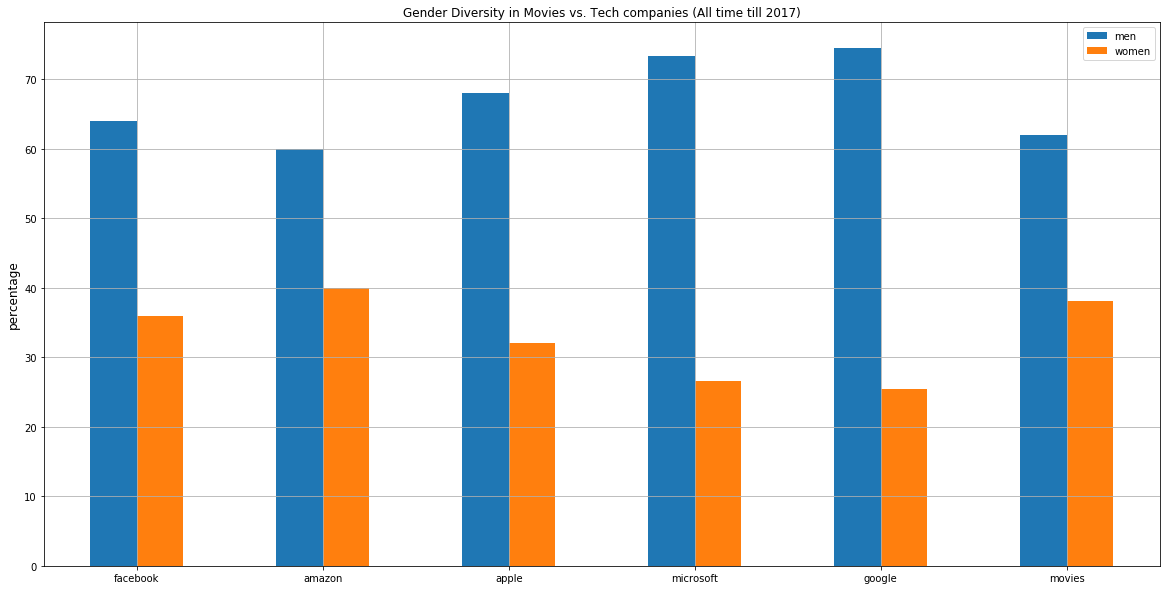

In [60]:
ax = global_percent.plot(kind='bar', title ="Gender Diversity in Movies vs. Tech companies (All time till 2017)", 
             figsize=(20, 10), legend=True, rot=0, fontsize=10)
ax.set_ylabel("percentage", fontsize=12)
plt.grid()
plt.show()

###### Finding 3 - We see that by comparing 2017 alone, gender diversity in movies while not very high was still highly comparable to that of Amazon while significantly better than Facebook, Apple, Microsoft and Google. This was a little suprising for me because I would have expected movies to do a little worse than the tech firms, not better than most of them.

But this comes with the caveat that though the diversity numbers released by companies include the entire workforce from the day they were founded, none of the companies were founded before 1975 (Microsoft is the oldest while the more recent ones like Google and Facebook were founded in the 2000s). We have seen the world and employment trends change so comparing the movies with stats from years as back as 1910 which was avery different time seems a little unfair. Which is why in the next visualization we will use movie data for movies only after 1975.

##### Visualization 4 - Gender diversity percentages, movies vs. tech firms (1975 - 2017).

Here, we will be doing the same analysis as above but instead of using data from 1910 - 2017, we will only be using data from 1975 since that is when the first of the tech companies in question was founded. It must be noted that there is a little leeway to companies founded later in this comparison.

We first take a subset of the percentages dataframe to get data for years after 1975.

In [61]:
percentages_75 = percentages[percentages.startYear > 1974]
percentages_75 = percentages_75.reset_index(drop=True)
percentages_75.head()

,startYear,num_actors,num_actresses,sum,actor_percentage,actress_percentage
0,1975,16005,8244,24249,66.002722,33.997278
1,1976,15546,8356,23902,65.040582,34.959418
2,1977,15820,8203,24023,65.853557,34.146443
3,1978,16571,8953,25524,64.923210,35.076790
4,1979,16684,9075,25759,64.769595,35.230405


Similar to the previous visualization, we calculate the total statistics, but this time from the ```percentages_75``` dataframe.

In [62]:
num_actors_total_75 = np.sum(percentages_75.num_actors)
num_actresses_total_75 = np.sum(percentages_75.num_actresses)
total_all_75 = num_actors_total_75+num_actresses_total_75

Now this can be used to calculate percentage:

In [63]:
males_percent_2017_75 = (num_actors_total_75/total_all_75)*100
females_percent_2017_75 = (num_actresses_total_75/total_all_75)*100

We take the percentages from above and add them to the ```global_percent``` dataframe.

In [64]:
global_percent.loc['movies'] = [males_percent_2017_75,females_percent_2017_75]

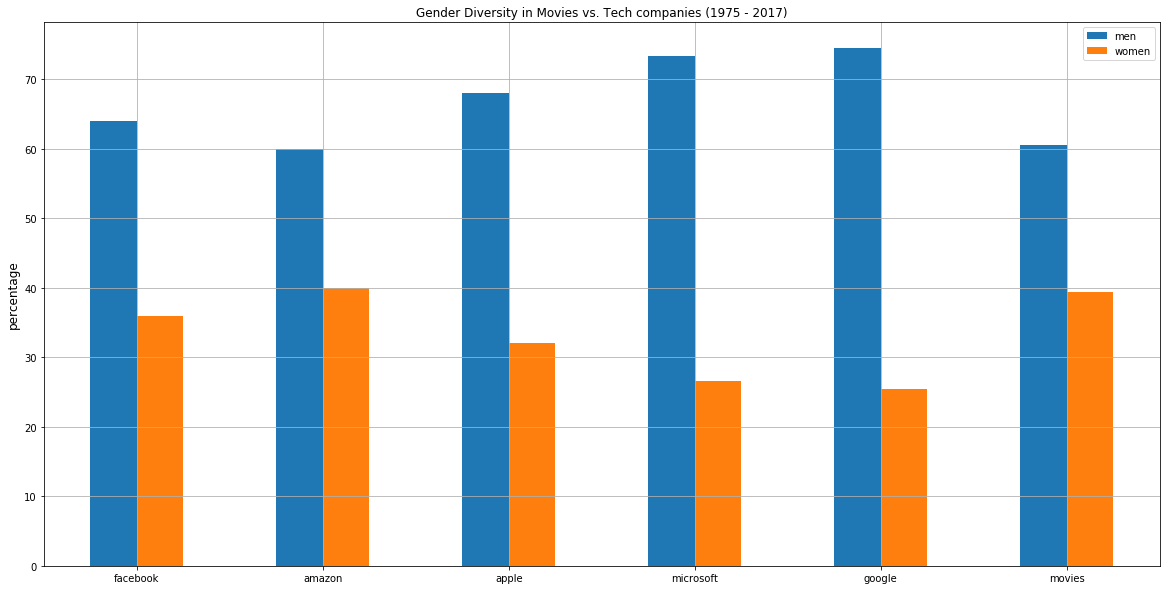

In [65]:
ax = global_percent.plot(kind='bar', title ="Gender Diversity in Movies vs. Tech companies (1975 - 2017)", 
             figsize=(20, 10), legend=True, rot=0, fontsize=10)
ax.set_ylabel("percentage", fontsize=12)
plt.grid()
plt.show()

###### Finding 4 - There is not any drastic difference between the gender diversity percentages in movies when comparing the post 1975 period to the overall time period from 1910. The equation remains the same with Amazon showing slightly better diversity statistics while the others show  lower percentages of diversity when compared to movies.

##### Visualization 5 - Comparing movies to only tech-force diversity (1975-2017)

Movies have a huge number of people working to bring the end product to the public. But perhaps the most important, most highly compensated section of the movies workforce is the actors and actresses. Similarly, the most important and highly compensated section of the tech industry are the tech workers. Apart from Amazon, all the other companies considered in this analysis release figures showing diversity in tech as opposed to global diversity. How will these statistics compare against each other?

Since we have already calculated the percentages for movies, we just append them to the ```tech_only_percent``` dataframe which has the values for the companies diversity in tech.

In [66]:
tech_only_percent.loc['movies'] = [males_percent_2017_75,females_percent_2017_75]

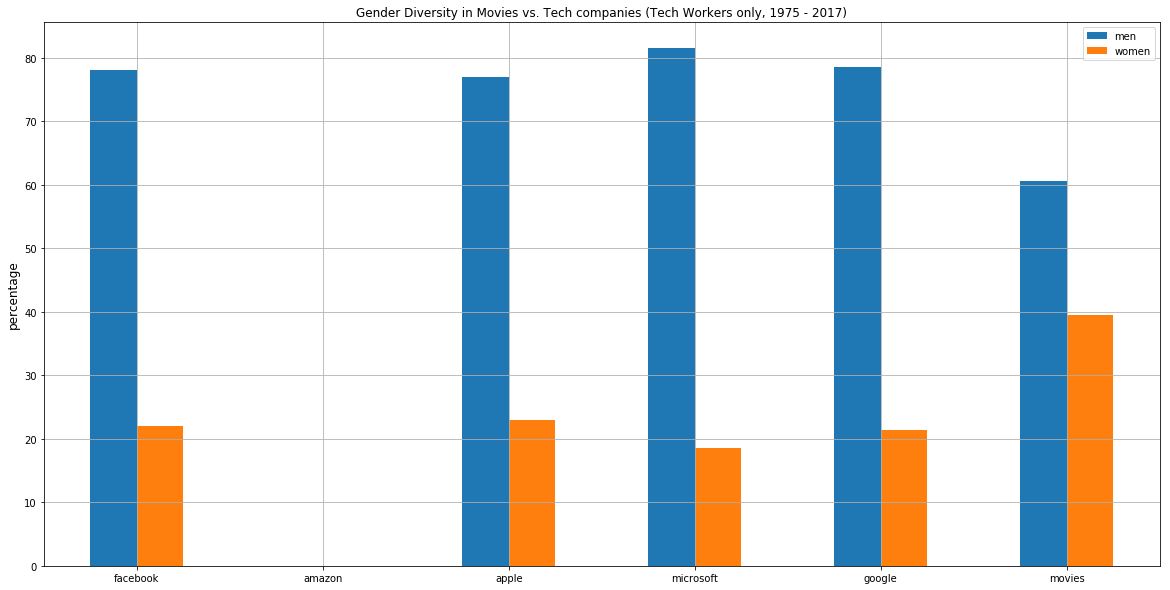

In [67]:
ax = tech_only_percent.plot(kind='bar', 
                            title ="Gender Diversity in Movies vs. Tech companies (Tech Workers only, 1975 - 2017)", 
                            figsize=(20, 10), 
                            legend=True, 
                            rot=0, 
                            fontsize=10)
ax.set_ylabel("percentage", 
              fontsize=12)
plt.grid()
plt.show()

###### Finding 5 - As seen above, if we compare gender diversity in movies in terms of actors/actresses to only tech force diversity in the tech industry then the movies outrank them all. Movies have around a 60/40 split leaning more towards actors, but the closest any tech firm comes is Apple with a mere 23% of their tech force comprised of females.

### Limitations and Future Work

An obvious limitation that was stated at the beginning is that this is a very limited scope analysis which compares only the numbers of employed actors/actresses with the number of male/female employees in tech companies. For a more comprehensive analysis, data like the gender information of non-acting members of the movie industry, gender information for non-binary people would help enrich the quality of this analysis.

If this information could be obtained from the companies and/or the movie industry then this analysis could be extended and built on for better understanding the diversity in both the industries.

Another limitation of the analysis is equal weight for every actor/actress irrespective of the length of their roles in a acting credit. While this is a little negated by the equal weight that companies give to a summer intern and a corporate head, it is true that in some cases simply more actresses on a screen would not be indicative of a more gender diverse environment. It would be complicated but combining movies scripts and the character names given in the IMDB dataset, we can estimate the number of lines spoken by a character and estimate that as a percentage of the whole script. This is also a possible future work on this analysis.

### Conclusion

The initial research question was how does gender diversity in movies stack up against diversity in the top tech companies. 

After this analysis, the first thing I wish to conclude is that it's tough to compare the two sectors, specially without more information of people behind the camera. Actors/actresses are a very small percentage of the movie industry and might not be representative of the industry at large.

But if we consider only actors/actresses, there seems to be more diversity in the movies than tech companies specially when comparing only the tech working force.

I hope this analysis has helped you see how data science skills can be used to explore a very human-centered topic of gender diversity which is becoming more and more important over the years. Humans have existed for hundreds of thousands of years and women got basic rights like the right to vote just over a hundred years ago. Analytics like these should serve as a reminder of how far we have to go before we achieve true equality.

### References

[Facebook's diversity report](https://newsroom.fb.com/news/2018/07/diversity-report/)

[Apple's](https://www.apple.com/diversity/)

[Google's diversity report](https://diversity.google/annual-report/)

[Microsoft's diversity report](https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx)

[Amazon's diversity report](https://www.amazon.com/b?ie=UTF8&node=10080092011)

[IMDB data details](https://www.imdb.com/interfaces/)

[IMDB data download](https://datasets.imdbws.com/)

https://womenintvfilm.sdsu.edu/files/2014-15_Boxed_In_Report.pdf

https://informationisbeautiful.net/visualizations/diversity-in-tech/

http://poly-graph.co/bechdel/

https://www.imdb.com/interfaces/

https://datasets.imdbws.com/

https://help.imdb.com/article/contribution/filmography-credits/cast-acting-creditguidelines/GH3JZC74FVYKKFMD#gender

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html